In [1]:
from mol_dyn_md import MolDynMD

import numpy as np
import matplotlib.pyplot as plt
from math import pi

%matplotlib inline

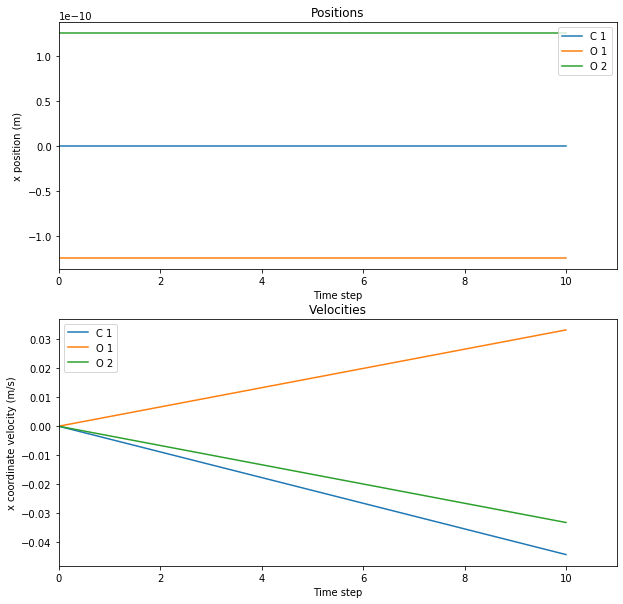

In [2]:
atom_types = [8, 6, 8]
atom_xyz = np.array([[-125.0e-12, 0., 0.], [0., 0., 0.], [125.0e-12, 0., 0.]])
atom_velocities = np.array([[0.001e-12, 0., 0.], [0., 0., 0.], [-0.001e-12, 0., 0.]])
atom_bonds = np.array([
    [[0., 0.], [116.2e-12, -0.01], [0., 0.]],
    [[116.2e-12, -0.01], [0., 0.], [116.2e-12, 0.]],
    [[0., 0.], [116.2e-12, -0.01], [0., 0.]]
])
atom_masses = np.array([2.657e-26, 1.993e-26, 2.657e-26])  # The reduced masses of hydrogen 1 (in H2) in kg

mol_dyn = MolDynMD(atom_types=atom_types,
                          atom_masses=atom_masses,
                          atom_velocities=atom_velocities,
                          atom_positions=atom_xyz,
                          atom_bonds=atom_bonds,
                          dt_s=1e-15,
                          grad_h_m=0.001e-15)

for _ in range(10):
    mol_dyn.timestep()
    
x_positions_C1 = []
x_velocities_C1 = []

x_positions_O1 = []
x_velocities_O1 = []

x_positions_O2 = []
x_velocities_O2 = []

for step in mol_dyn.trajectory:
    positions = step["atom_positions"]
    velocities = step["atom_velocities"]
    x_positions_C1.append(positions[1, 0])
    x_positions_O1.append(positions[0, 0])
    x_positions_O2.append(positions[2, 0])
    
    x_velocities_C1.append(velocities[1, 0])
    x_velocities_O1.append(velocities[0, 0])
    x_velocities_O2.append(velocities[2, 0])
    
x_positions_C1 = np.array(x_positions_C1)
x_positions_O1 = np.array(x_positions_O1)
x_positions_O2 = np.array(x_positions_O2)
x_velocities_C1 = np.array(x_velocities_C1) 
x_velocities_O1 = np.array(x_velocities_O1)
x_velocities_O2 = np.array(x_velocities_O2)

timesteps = np.arange(len(x_positions_C1))

_, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axs[0].set_xlim(0, len(x_positions_C1))
axs[0].set_title("Positions")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("x position (m)")
axs[0].plot(timesteps, x_positions_C1, label="C 1")
axs[0].plot(timesteps, x_positions_O1, label="O 1")
axs[0].plot(timesteps, x_positions_O2, label="O 2")
axs[0].legend(loc="best")

axs[1].set_xlim(0, len(x_velocities_C1))
axs[1].set_title("Velocities")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("x coordinate velocity (m/s)")
axs[1].plot(timesteps, x_velocities_C1, label="C 1")
axs[1].plot(timesteps, x_velocities_O1, label="O 1")
axs[1].plot(timesteps, x_velocities_O2, label="O 2")
axs[1].legend(loc="best")